In [25]:
conda install tensorflow

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [26]:
import tensorflow as tf
print(tf.__version__)

1.14.0


In [27]:
# Load Dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [28]:
type(data)

sklearn.utils.Bunch

In [29]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [30]:
data.data.shape

(569, 30)

In [31]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [32]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [33]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [34]:
# Spliting of data and model building:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data,data.target,test_size=0.33)

In [35]:
N,D=X_train.shape

In [36]:
data.data.shape

(569, 30)

In [37]:
N

381

In [38]:
D

30

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [40]:
X_train

array([[ 1.56363081, -0.24459474,  1.5181619 , ...,  1.72967547,
         1.15373052, -0.33568896],
       [-0.2523298 ,  0.28876237, -0.30611768, ..., -1.11504919,
        -0.32587178, -0.52855962],
       [ 1.95068652,  2.6798294 ,  1.87760503, ...,  0.80911791,
        -0.0292959 , -0.10348992],
       ...,
       [-0.64520589, -0.42313377, -0.67782416, ..., -1.09781785,
         0.51469963, -0.98810899],
       [ 1.38028863,  0.48990128,  1.33632597, ...,  1.41299125,
         1.29956065,  0.7865166 ],
       [ 0.9204781 ,  0.63454049,  0.85847805, ...,  1.31363934,
         0.54091628, -0.45259659]])

In [41]:
X_test

array([[ 1.13583240e+00,  1.17919754e+00,  1.01071278e+00, ...,
        -2.77349272e-03, -6.25724739e-01, -2.48951033e-01],
       [ 6.76021860e-01,  9.10258998e-01,  7.48530737e-01, ...,
         1.72346598e+00,  3.17568981e+00,  6.48597913e-01],
       [-8.89662127e-01, -4.66073534e-01, -8.27521652e-01, ...,
         6.47671056e-01, -5.66737272e-01,  6.04420834e-01],
       ...,
       [-1.18460907e-01,  8.96699071e-01, -1.73758037e-01, ...,
        -6.52597092e-01, -3.99606115e-01, -7.85002174e-01],
       [ 1.31815715e-01,  4.96681242e-01,  1.24791195e-01, ...,
         1.35387760e-01,  2.19762290e-01, -8.42647874e-01],
       [-1.47752117e+00, -7.91511768e-01, -1.37683532e+00, ...,
        -1.16922703e+00, -2.02176146e+00, -3.70707372e-01]])

In [42]:
# Way 2:
model = tf.keras.models.Sequential() # Sequentionl Layer is like a placeholder
model.add(tf.keras.layers.Dense(1,input_shape=(D,), activation='sigmoid'))


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [43]:
# Call compile() wherein the optimizer used as 'adam' and loss as 'binary_crossentropy' as accuracy as our metric:
model.compile(
    optimizer = 'adam',
    loss='binary_crossentropy',
    metrics=['accuracy'] 
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [45]:
# Training the model for 100 epochs i.e 100 times:
r = model.fit(X_train,y_train, validation_data=(X_test,y_test),epochs=100)
# Evalute the model:
print('Training Score:',model.evaluate(X_train,y_train))
print('Testing Score:',model.evaluate(X_test,y_test))

Train on 381 samples, validate on 188 samples
Epoch 1/100
381/381 [==============================] - 0s 105us/sample - loss: 0.1056 - acc: 0.9711 - val_loss: 0.0854 - val_acc: 0.9787
Epoch 2/100
381/381 [==============================] - 0s 102us/sample - loss: 0.1051 - acc: 0.9711 - val_loss: 0.0850 - val_acc: 0.9787
Epoch 3/100
381/381 [==============================] - 0s 123us/sample - loss: 0.1046 - acc: 0.9711 - val_loss: 0.0845 - val_acc: 0.9787
Epoch 4/100
381/381 [==============================] - 0s 116us/sample - loss: 0.1042 - acc: 0.9711 - val_loss: 0.0840 - val_acc: 0.9787
Epoch 5/100
381/381 [==============================] - 0s 108us/sample - loss: 0.1037 - acc: 0.9711 - val_loss: 0.0836 - val_acc: 0.9787
Epoch 6/100
381/381 [==============================] - 0s 108us/sample - loss: 0.1033 - acc: 0.9711 - val_loss: 0.0831 - val_acc: 0.9787
Epoch 7/100
381/381 [==============================] - 0s 126us/sample - loss: 0.1028 - acc: 0.9711 - val_loss: 0.0826 - val_acc: 0.

Epoch 60/100
381/381 [==============================] - 0s 102us/sample - loss: 0.0867 - acc: 0.9816 - val_loss: 0.0664 - val_acc: 0.9840
Epoch 61/100
381/381 [==============================] - 0s 81us/sample - loss: 0.0865 - acc: 0.9816 - val_loss: 0.0662 - val_acc: 0.9840
Epoch 62/100
381/381 [==============================] - 0s 84us/sample - loss: 0.0863 - acc: 0.9816 - val_loss: 0.0661 - val_acc: 0.9840
Epoch 63/100
381/381 [==============================] - 0s 87us/sample - loss: 0.0861 - acc: 0.9816 - val_loss: 0.0659 - val_acc: 0.9840
Epoch 64/100
381/381 [==============================] - 0s 81us/sample - loss: 0.0859 - acc: 0.9816 - val_loss: 0.0656 - val_acc: 0.9840
Epoch 65/100
381/381 [==============================] - 0s 84us/sample - loss: 0.0857 - acc: 0.9816 - val_loss: 0.0655 - val_acc: 0.9840
Epoch 66/100
381/381 [==============================] - 0s 81us/sample - loss: 0.0854 - acc: 0.9816 - val_loss: 0.0653 - val_acc: 0.9840
Epoch 67/100
381/381 [==================

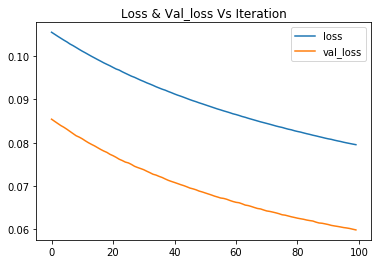

In [47]:
# Lets Plot Loss Per Iteration:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.title('Loss & Val_loss Vs Iteration')
plt.xlabel=['Iterations']
plt.ylabel=['Loss & Val_loss']
plt.legend()

**Output: There is a decrease in loss per iteration.**

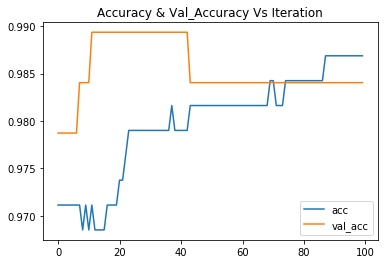

In [48]:
# Plotting Accuracy:
plt.plot(r.history['acc'], label='acc')
plt.plot(r.history['val_acc'], label='val_acc')
plt.title('Accuracy & Val_Accuracy Vs Iteration')
plt.xlabel=['Iterations']
plt.ylabel=['Accuracy & Val_Accuracy']
plt.legend()

**Output: The Accuracy is increasing with each iterations.**

In [49]:
# Making predictions:
y_pred = model.predict(X_test)
print(y_pred)

[[2.41430402e-02]
 [7.63177872e-04]
 [9.62284803e-01]
 [1.86021924e-02]
 [9.98293400e-01]
 [8.14955533e-01]
 [9.58439708e-03]
 [2.98023224e-07]
 [0.00000000e+00]
 [5.27175069e-02]
 [1.10327959e-01]
 [0.00000000e+00]
 [9.55594897e-01]
 [8.78500164e-01]
 [9.96432781e-01]
 [1.04308128e-06]
 [9.83059883e-01]
 [9.75501776e-01]
 [8.25740457e-01]
 [4.92612720e-02]
 [9.96012330e-01]
 [9.99659181e-01]
 [9.99125898e-01]
 [9.65955198e-01]
 [1.82947814e-01]
 [9.94226694e-01]
 [9.83139515e-01]
 [9.99904752e-01]
 [9.99065042e-01]
 [9.24382448e-01]
 [9.99856353e-01]
 [3.86255682e-01]
 [9.99927640e-01]
 [2.08616257e-07]
 [9.98125553e-01]
 [9.94442344e-01]
 [1.16169453e-04]
 [9.99815345e-01]
 [9.91829157e-01]
 [1.82399154e-03]
 [1.32860541e-02]
 [9.97936606e-01]
 [2.23406911e-01]
 [9.97172654e-01]
 [9.72771287e-01]
 [9.96521950e-01]
 [4.34574485e-03]
 [9.92197335e-01]
 [1.50819421e-01]
 [3.85752320e-03]
 [9.92455125e-01]
 [5.75752258e-02]
 [9.96602416e-01]
 [9.66862619e-01]
 [4.54819411e-01]
 [9.951742

# The outputs(Our predictions from the model) are in the range of 0 and 1 which is true to the behavior of a Sigmoid Function.